In [1]:
import json
import pandas as pd
import time
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os

In [2]:
trait_name = 'attractive'
trial_csv = './'+trait_name+'/trialdata.csv'
column_names = ["subId", "trialNum", "trialId", "jsonStr"]
trial = pd.read_csv(trial_csv, names=column_names, header=None)
trial.head()

,subId,trialNum,trialId,jsonStr
0,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,0,1547803012714,"{""rt"": 23748, ""trial_type"": ""instructions"", ""v..."
1,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,1,1547803018753,"{""rt"": 5913, ""trial_type"": ""face-likert-amanda..."
2,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,2,1547803031250,"{""rt"": 12492, ""trial_type"": ""face-likert-amand..."
3,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,3,1547803036472,"{""rt"": 5218, ""trial_type"": ""face-likert-amanda..."
4,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,4,1547803042015,"{""rt"": 5540, ""trial_type"": ""face-likert-amanda..."


In [3]:
likert_data_df = pd.DataFrame(columns=['subId', 'rt', 'imgName', 'rating', 'trial_index', 'debug_mode'])
likert_counter = 0

for index, row in trial.iterrows():
    json_dict = json.loads(row['jsonStr'])
    if 'task_type' in json_dict:
        if json_dict['task_type'] == 'face trials':
            likert_data_df.loc[likert_counter, 'subId'] = row['subId']
            likert_data_df.loc[likert_counter, 'rt'] = json_dict['rt']
            likert_data_df.loc[likert_counter, 'imgName'] = os.path.basename(json_dict['imgName'])
            
            likert_data_df.loc[likert_counter, 'trial_index'] = json_dict['trial_index']
            # rating encoding starts from 0, add 1 to go back to 1-9 space
            likert_data_df.loc[likert_counter, 'rating'] = json.loads(json_dict['responses'])['Q0'] + 1
            likert_data_df.loc[likert_counter, 'debug_mode'] = json_dict['debug_mode']
            likert_counter += 1
        
likert_data_df.to_csv('./'+trait_name+'/likert_data.csv')

In [4]:
likert_data_df.shape

(1500, 6)

In [5]:
# make a list for subjects
likert_data = likert_data_df
sub_num_dict = {}
sub_counter = 1
for sub_id in likert_data['subId']:
    if sub_id not in sub_num_dict:
        sub_num_dict[sub_id] = sub_counter
        sub_counter += 1

likert_data['subNum'] = likert_data['subId'].map(sub_num_dict)

img_num_dict = {}
img_counter = 0
for img_name in likert_data['imgName']:
    if img_name not in img_num_dict:
        img_num_dict[img_name] = img_counter
        img_counter += 1
        
likert_data['imgNum'] = likert_data['imgName'].map(img_num_dict)

likert_data = likert_data.sort_values(by=['subNum', 'imgNum'], ascending=True)

In [6]:
likert_data.head()

,subId,rt,imgName,rating,trial_index,debug_mode,subNum,imgNum
0,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,5913,054808.jpg,8,1,live,1,0
1,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,12492,100138.jpg,4,2,live,1,1
39,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,4365,100138.jpg,8,43,live,1,1
2,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,5218,144010.jpg,2,3,live,1,2
3,A2JBCLJVJ2VXVZ:3C5W7UE9CHX9GZANGWNG47LTUR4XMB,5540,059217.jpg,9,4,live,1,3


In [9]:
likert_data = likert_data[['subNum', 'imgNum', 'rating', 'rt', 'imgName']]
likert_data['rating'] = likert_data['rating'].astype(np.int64)

In [39]:
data_df = likert_data.groupby('imgNum', as_index=False)['rating'].mean()

In [37]:
gt_rating_name = '../../preparation_data/amt_gt_validation/attractive_stim_lst.csv'
gt_rating_df = pd.read_csv(gt_rating_name)

In [38]:
gt_rating_df['imgNum'] = gt_rating_df['Filename'].map(img_num_dict)
gt_rating_df = gt_rating_df.sort_values(by=['imgNum'], ascending=True)
gt_rating_df['attractive'] = gt_rating_df['attractive'].astype(np.float64)
gt_rating_df.groupby('imgNum', as_index=False)['attractive'].mean()

,imgNum,attractive
0,0,7.043707
1,1,5.060690
2,2,3.154254
3,3,6.738256
4,4,4.145605
5,5,3.078212
6,6,2.620402
7,7,8.034778
8,8,5.289477
9,9,6.128350


In [40]:
gt_df = gt_rating_df.groupby('imgNum', as_index=False)['attractive'].mean()

In [41]:
data_df.head()

,imgNum,rating
0,0,7.533333
1,1,6.366667
2,2,4.800000
3,3,7.600000
4,4,4.600000


In [42]:
gt_df.head()

,imgNum,attractive
0,0,7.043707
1,1,5.060690
2,2,3.154254
3,3,6.738256
4,4,4.145605


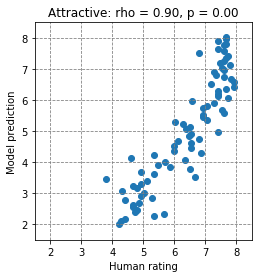

In [57]:
rho, p = spearmanr(data_df['rating'], gt_df['attractive'])
title_txt = 'Attractive: rho = {:.2f}, p = {:.2f}'.format(rho, p)
plt.title(title_txt)
plt.xlabel('Human rating')
plt.ylabel('Model prediction')
## setting the limits on the x-axis and y-axis
plt.xlim(1.5,8.5)
plt.ylim(1.5,8.5)
plt.grid(color='gray', linestyle='--')
plt.axes().set_aspect('equal')
plt.scatter(data_df['rating'], gt_df['attractive'])
plt.show()

In [58]:
# next, check the self-consistency of the 15 subjects. 
likert_data.head()

,subNum,imgNum,rating,rt,imgName
0,1,0,8,5913,054808.jpg
1,1,1,4,12492,100138.jpg
39,1,1,8,4365,100138.jpg
2,1,2,2,5218,144010.jpg
3,1,3,9,5540,059217.jpg
